Dentro deste projeto/aula foram utilizadas diferentes planilhas em Excel referente a uma rede de lojas situadas em diferentes localidades, com informações sobre suas vendas dentro de um determinado período de tempo.

Com isso foi possível utilizar novas funcionalidades no tratatamento e visualização de dados que permitiram a criação de novas colunas, o tratmento de valores faltantes e a utilização de recursos com datas. Foram utilizadas técnicas que permitiram a combinação de informações úteis que poderá subsidiar a empresa na tomada de decisões de seus negócios.

# **Trabalhando com Planilhas do Excel**

In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Leitura dos arquivos
#Foi utilizado a opçãp de upload para o carregamento dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as 5 primeira linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Exibindo uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
35,Aracaju,2018-01-01,40.60,1520,3
46,Aracaju,2018-01-01,41.42,1522,2
149,Natal,2019-01-02,22.38,1034,3
89,Natal,2019-01-02,17.46,1034,1
49,Natal,2019-04-01,831.00,852,2


In [ ]:
#Verifacando tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# **Tratando Valores Faltantes**

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
  #obs: inplace=True implica que o valor seja modificado em memória.

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(subset=["Vendas"], inplace=True) 

In [ ]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

# **Criando colunas novas**

In [ ]:
#Criando a coluna de Receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head

<bound method NDFrame.head of        Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas
0     Aracaju 2018-01-01  142.00   1520     1   142.00             1.0
1     Aracaju 2018-01-01   14.21   1522     6    85.26             6.0
2     Aracaju 2018-01-01   71.55   1520     1    71.55             1.0
3     Aracaju 2018-01-01    3.01   1521     7    21.07             7.0
4     Aracaju 2018-01-01   24.51   1522     8   196.08             8.0
..        ...        ...     ...    ...   ...      ...             ...
235  Salvador 2019-01-03   41.84   1034     1    41.84             1.0
236  Salvador 2019-01-03  126.29   1035     3   378.87             3.0
237  Salvador 2019-01-03   38.06   1036     3   114.18             3.0
238  Salvador 2019-01-03  139.64   1035     1   139.64             1.0
239  Salvador 2019-01-03  161.41   1037     3   484.23             3.0

[894 rows x 7 columns]>

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior Receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor Receita
df["Receita"].min()

3.34

In [ ]:
#Verificando as três maiores Receitas (nlargest)
df.nlargest(3, "Receita")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#Verificando as três menores Receitas (nlargest)
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
 #Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)
#obs: ascending=False => ordena do maior para o menor.

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com datas**

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento da Receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
62,Fortaleza,2019-01-01,106.21,1005,6,637.26,6.0,2019
54,Natal,2018-10-03,373.00,852,4,1492.00,4.0,2018
58,Recife,2019-01-01,8.02,983,2,16.04,2.0,2019
30,Aracaju,2018-01-01,119.21,1520,8,953.68,8.0,2018
180,Salvador,2019-01-02,116.63,1035,2,233.26,2.0,2019


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
210,Natal,2019-01-02,197.64,1035,1,197.64,1.0,2019,1,2
121,Natal,2019-01-02,100.70,1037,3,302.10,3.0,2019,1,2
52,Natal,2018-04-27,778.00,854,4,3112.00,4.0,2018,4,27
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
68,Natal,2018-06-22,274.00,852,3,822.00,3.0,2018,6,22,172 days
238,Natal,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days
202,Salvador,2019-01-02,22.45,1036,1,22.45,1.0,2019,1,2,366 days
180,Salvador,2019-01-02,116.63,1035,2,233.26,2.0,2019,1,2,366 days
31,Recife,2019-01-01,176.23,981,7,1233.61,7.0,2019,1,1,365 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
35,Recife,2019-01-01,148.90,983,1,148.90,1.0,2019,1,1,365 days,1
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,1.0,2019,1,1,365 days,1
78,Fortaleza,2019-01-01,37.66,1005,2,75.32,2.0,2019,1,1,365 days,1
236,Natal,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days,1
8,Recife,2019-02-11,56.47,980,6,338.82,6.0,2019,2,11,406 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
122,Fortaleza,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
141,Salvador,2019-03-02,9.08,1036,1,9.08,1.0,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
120,Salvador,2019-03-02,140.17,1036,2,280.34,2.0,2019,3,2,425 days,1


# **Visualização de dados**

In [ ]:
#Realizando a contagem
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

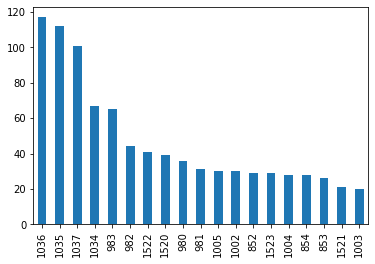

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

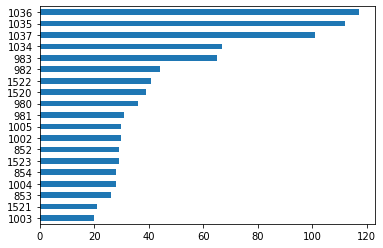

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

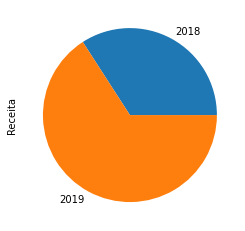

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

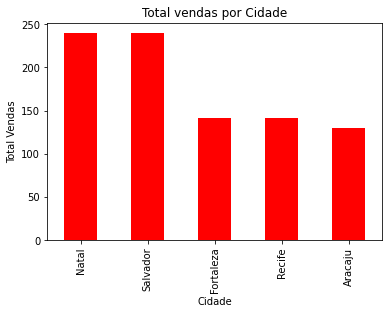

In [ ]:
#Adicionando um tĩtulo e alterando o nome dos eixos
  #matplotlib é utilizado a estilização dos gráficos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
  #obs: os estilos podem ser encontrados no site matplotlib.org
    # .plot cria um gráfico de linhas
plt.style.use("ggplot")

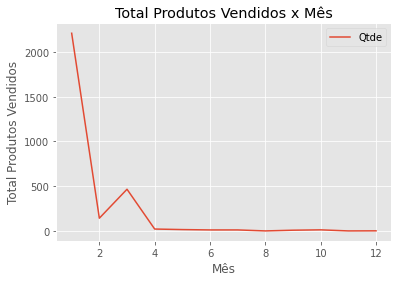

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [ ]:
#Quantidade de produtos vendidos no mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

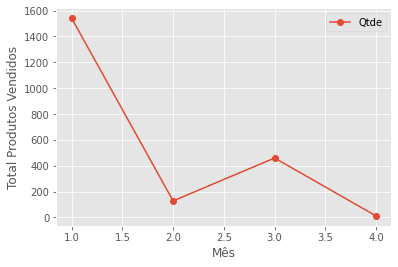

In [ ]:
#Total produtos vendidos por mês em 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

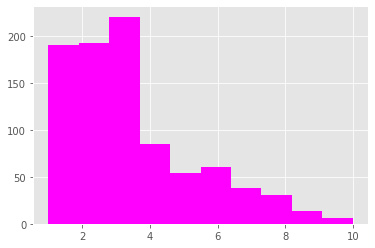

In [ ]:
#Histograma
  # Outras colors podem ser encontradas em matplotlib.org
plt.hist(df["Qtde"], color="magenta");

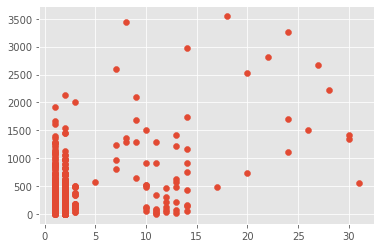

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

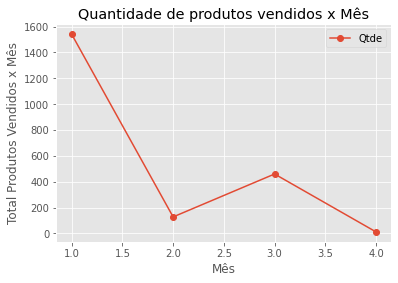

In [ ]:
#Salvando em png (plt.savefig)
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos x Mês")
plt.legend()
plt.savefig("grafico QTDE x MES.png")